**Lab Assignment 3: Exploring calculus concepts with Python**


In this assignment you will need to use SymPy in addition to NumPy.


**Remember to follow the principles of the rubric we developed:**

1. Clarity/Comments
2. Accuracy
3. Typos
4. Grammar/Syntax

In [1]:
import sympy as sp
import numpy as np

**1). Consider the function f(x,y)=exp(-(x^2+y^2))**

*This notation means e^(-(x^2+y^2))*

**Define the function in SymPy**



In [2]:
# You first need to define the symbols x and y, as SymPy is a symbolic math library

# Then you can define the function f in terms of x and y

# Experiment with different ways to print f: first try regularly, and then try the following:
# sp.init_printing()
# sp.latex(f)


# Define symbols for x and y
x, y = sp.symbols('x y')

# Define the function f(x, y)
f = sp.exp(-(x**2 + y**2))

print("Function f(x, y):", f)

# Enable pretty printing
sp.init_printing()

# Print the function in a more readable format
print("Pretty Print:")
sp.pprint(f)

# Print the LaTeX representation of the function
print("LaTeX Representation:")
print(sp.latex(f))

Function f(x, y): exp(-x**2 - y**2)
Pretty Print:
    2    2
 - x  - y 
ℯ         
LaTeX Representation:
e^{- x^{2} - y^{2}}


**Plot the function surface in 3D**

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.02-3D-Plotting.html#:~:text=We%20could%20plot%203D%20surfaces,functions%20are%20surf%20and%20contour.

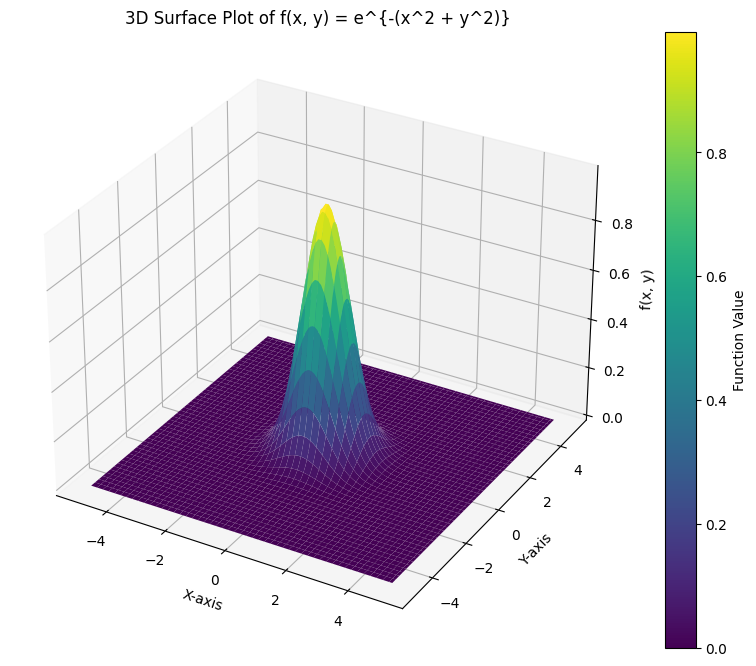

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the range of values for x and y using linspace - try playing with these values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a grid of points from the ranges defined
X, Y = np.meshgrid(x, y)

# Calculate the values of the function f(x, y)
Z = np.exp(-(X**2 + Y**2))

# Create a 3D plot using Axes3D
fig = plt.figure(figsize=(10, 8)) # Defining the figure
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)

# Add labels and a color bar
# Use code ax.set_xlabel('Label Name')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Surface Plot of f(x, y) = e^{-(x^2 + y^2)}')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=cm.viridis)
sm.set_array(Z)
plt.colorbar(sm, label='Function Value', ax=ax)

# Show the plot
plt.show()

**Use SymPy to compute the gradient $\nabla$ f. Print the partial derivatives and the gradient vector.**

https://www.askpython.com/python/examples/derivatives-in-python-sympy

In SymPy, we need to define a coordinate system to express the gradient vector.

The coordinate system defines directions and components which we use for  our vectors.

https://docs.sympy.org/latest/modules/vector/coordsys.html



In [4]:
from sympy import *
from sympy.vector import CoordSys3D

# Calculate the partial derivatives wrt x and y
# Make sure you define that the derivative is of f wrt to the variable
# eg. dx = diff(x) means to take the derivative of x wrt to itself, whereas dx = f.diff(x) or dx = diff(f,x) is what we want

# Print the partials dx and dy

# To define the coordinate system, use
# N = CoordSys3D('N') - or name it something different

# When we calculate the gradient vector, we define that dx is in the i direction of the system N, and dy is in the j direction
# gradient = dx*N.i + dy*N.j


# Define symbols x and y
x, y = sp.symbols('x y')

# Define the function
f = sp.exp(-(x**2 + y**2))

# Calculate the partial derivatives
dx = sp.diff(f, x)  # Derivative of f with respect to x
dy = sp.diff(f, y)  # Derivative of f with respect to y

# Print the partial derivatives
print("Partial derivative with respect to x:")
sp.pprint(dx)

print("")

print("Partial derivative with respect to y:")
sp.pprint(dy)

# Define a 3D coordinate system
N = CoordSys3D('N')

# Define the gradient vector in the coordinate system
gradient = dx*N.i + dy*N.j

print("")

# Print the gradient vector
print(" Gradient vector: ")
print("")
sp.pprint(gradient)

Partial derivative with respect to x:
         2    2
      - x  - y 
-2⋅x⋅ℯ         

Partial derivative with respect to y:
         2    2
      - x  - y 
-2⋅y⋅ℯ         

 Gradient vector: 

⎛         2    2⎞       ⎛         2    2⎞    
⎜      - x  - y ⎟ i_N + ⎜      - x  - y ⎟ j_N
⎝-2⋅x⋅ℯ         ⎠       ⎝-2⋅y⋅ℯ         ⎠    


**Plot a 2d contour map of the gradient**

https://glowingpython.blogspot.com/2012/01/how-to-plot-two-variable-functions-with.html

https://www.tutorialspoint.com/sympy/sympy_lambdify_function.htm

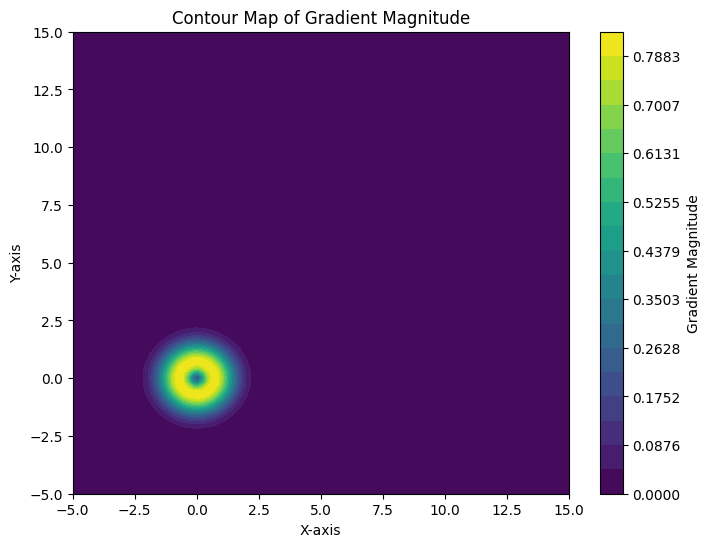

In [5]:
# You may repeat some steps from above such as:

# Define again a range of values for x and y using np.linspace and create a meshgrid of the values
# Calculate the values of the function

# Or, if you have not rewritten over/redefined these names you can simply call them again from previously

# Now you may choose to recalculate the gradient in NumPy:
# grad_x, grad_y = np.gradient(Z, x, y)

# Or you can lambdify the SymPy expressions into NumPy numerical representations of the gradient
# This is more complicated but useful to know - you can try it to challenge yourself if you would like!


# Define the range of values for x and y
x = np.linspace(-5, 15, 100)
y = np.linspace(-5, 15, 100)

# Create a grid of points from the ranges defined
X, Y = np.meshgrid(x, y)

# Calculate the values of the function f(x, y)
Z = np.exp(-(X**2 + Y**2))

# Calculate the gradient using NumPy
grad_x, grad_y = np.gradient(Z, x, y)

# Plot the contour map
plt.figure(figsize=(8, 6))
# Gradient magnitude
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
contour_levels = np.linspace(0, np.max(gradient_magnitude), 20)  # Define contour levels
contour = plt.contourf(X, Y, gradient_magnitude, levels=contour_levels, cmap='viridis')
plt.colorbar(label='Gradient Magnitude')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Contour Map of Gradient Magnitude')
plt.show()

**Graph the gradient at points in the plane with coordinates  (2i,2j) with I,j=0,1,2,3,4,5,6,7,8 (a total of 64 points) as a vector with a tail end at the point itself and an arrow pointing out at the other hand. The result should be a “field” of arrows, all pointing towards the origin, whose length shrinks the more we move away from the origin.**

https://www.tutorialspoint.com/how-to-plot-2d-math-vectors-with-matplotlib


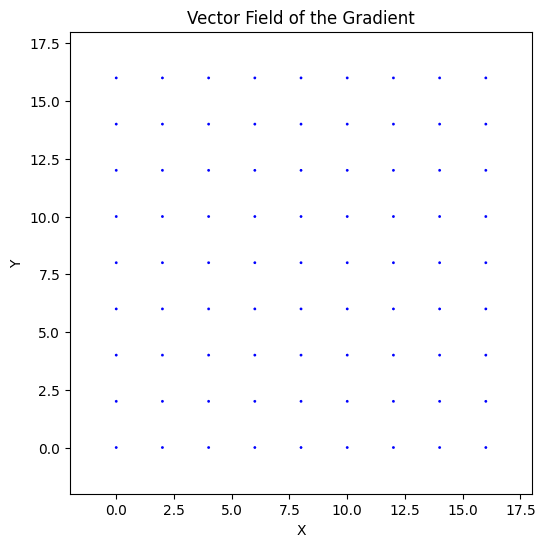

In [6]:
# Define the range of i and j values - this generates integers between 0 and 8 inclusive
i_values = np.arange(0, 9)
j_values = np.arange(0, 9)

# Create a meshgrid of coordinates
I, J = np.meshgrid(i_values, j_values)

#multiply I and J by two to get the X and Y arrays that are 2i and 2j
X = 2 * I
Y = 2 * J

# Redefined the components of the gradient to be in the meshgrid
grad_x = -2 * X * np.exp(-(X**2 + Y**2))
grad_y = -2 * Y * np.exp(-(X**2 + Y**2))

# Create a plot with arrows
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, grad_x, grad_y, scale=20, color='b', pivot='tail')
plt.xlim(-2, 18)
plt.ylim(-2, 18)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vector Field of the Gradient')
plt.show()


**2). Repeat the same procedure  for the function g(x,y)= cos (x^2+y^2)/(1+x^2+y^2)**


**Define the function in SymPy**

In [7]:
# Define symbols
x, y = sp.symbols('x y')

# Define the function g(x, y)
g = sp.cos(x**2 + y**2) / (1 + x**2 + y**2)

# Print the function
print("Function g(x, y):", g)

# Initialize pretty printing
sp.init_printing()

# Print the function in a more readable format
print("Pretty Print:")
sp.pprint(f)

print("")

# Print the LaTeX representation of the function
print("LaTeX representation of g(x, y):")
print(sp.latex(g))

Function g(x, y): cos(x**2 + y**2)/(x**2 + y**2 + 1)
Pretty Print:
    2    2
 - x  - y 
ℯ         

LaTeX representation of g(x, y):
\frac{\cos{\left(x^{2} + y^{2} \right)}}{x^{2} + y^{2} + 1}


**Plot the function surface in 3D**

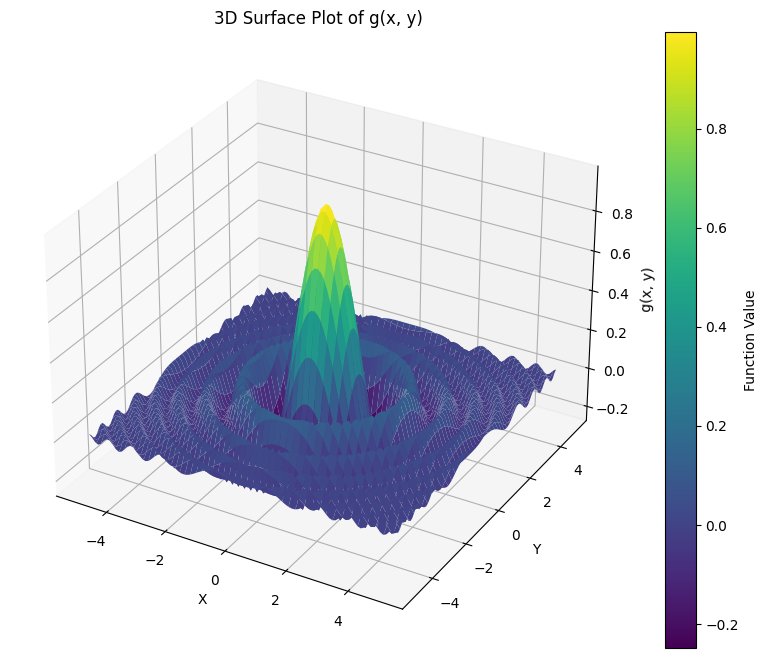

In [8]:
# Define the range of values for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a meshgrid of points
X, Y = np.meshgrid(x, y)

# Calculate g(x, y)
Z = np.cos(X**2 + Y**2) / (1 + X**2 + Y**2)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)

# Add labels and a color bar
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('g(x, y)')
ax.set_title('3D Surface Plot of g(x, y)')

sm = plt.cm.ScalarMappable(cmap=cm.viridis)
sm.set_array(Z)
plt.colorbar(sm, label='Function Value', ax=ax)

# Show the plot
plt.show()


**Use SymPy to compute the gradient  ∇  f. Print the partial derivatives and the gradient vector.**

In [9]:
# Define symbols x and y
x, y = sp.symbols('x y')

# Define the function g(x, y)
g = sp.cos(x**2 + y**2) / (1 + x**2 + y**2)

# Partial derivatives with respect to x and y
dg_dx = sp.diff(g, x)  # Derivative of g with respect to x
dg_dy = sp.diff(g, y)  # Derivative of g with respect to y


# Print the partial derivatives
print("Partial derivative with respect to x:")
print("")
print("")
sp.pprint(dg_dx)

print("")

print("Partial derivative with respect to y:")
print("")
print("")
sp.pprint(dg_dy)

# Define a 3D coordinate system
N = CoordSys3D('N')

# Define the gradient vector in the coordinate system
gradient = dx*N.i + dy*N.j

print("")

# Print the gradient vector
print(" Gradient vector: ")
print("")
print("")
sp.pprint(gradient)

Partial derivative with respect to x:


         ⎛ 2    2⎞          ⎛ 2    2⎞
  2⋅x⋅sin⎝x  + y ⎠   2⋅x⋅cos⎝x  + y ⎠
- ──────────────── - ────────────────
     2    2                        2 
    x  + y  + 1       ⎛ 2    2    ⎞  
                      ⎝x  + y  + 1⎠  

Partial derivative with respect to y:


         ⎛ 2    2⎞          ⎛ 2    2⎞
  2⋅y⋅sin⎝x  + y ⎠   2⋅y⋅cos⎝x  + y ⎠
- ──────────────── - ────────────────
     2    2                        2 
    x  + y  + 1       ⎛ 2    2    ⎞  
                      ⎝x  + y  + 1⎠  

 Gradient vector: 


⎛         2    2⎞       ⎛         2    2⎞    
⎜      - x  - y ⎟ i_N + ⎜      - x  - y ⎟ j_N
⎝-2⋅x⋅ℯ         ⎠       ⎝-2⋅y⋅ℯ         ⎠    


**Plot a 2d contour map of the gradient**

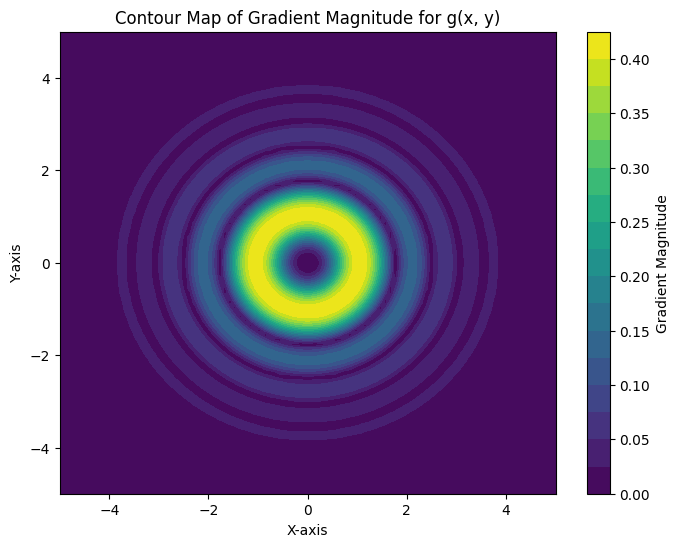

In [10]:
# Compute gradient numerically for g(x, y)
grad_x = -2 * X * np.sin(X**2 + Y**2) / (1 + X**2 + Y**2)**2
grad_y = -2 * Y * np.sin(X**2 + Y**2) / (1 + X**2 + Y**2)**2

# Compute the magnitude of the gradient
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Plot the contour map
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, gradient_magnitude, levels=20, cmap='viridis')
plt.colorbar(label='Gradient Magnitude')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Contour Map of Gradient Magnitude for g(x, y)')
plt.show()


**Graph the gradient at points in the plane with coordinates  (2i,2j) with I,j=0,1,2,3,4,5,6,7,8 (a total of 64 points) as a vector with a tail end at the point itself and an arrow pointing out at the other hand. The result should be a “field” of arrows, all pointing towards the origin, whose length shrinks the more we move away from the origin.**


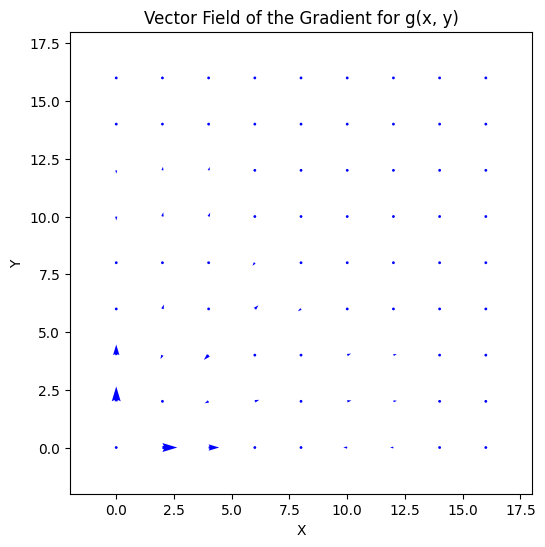

In [11]:
# Define the range of i and j values
i_values = np.arange(0, 9)
j_values = np.arange(0, 9)

# Create a meshgrid of i and j
I, J = np.meshgrid(i_values, j_values)

# Generate coordinates for (2i, 2j)
X_points = 2 * I
Y_points = 2 * J

# Redefine the components of the gradient for (X_points, Y_points)
grad_x_field = -2 * X_points * np.sin(X_points**2 + Y_points**2) / (1 + X_points**2 + Y_points**2)**2 \
               - 2 * X_points * np.cos(X_points**2 + Y_points**2) / (1 + X_points**2 + Y_points**2)
grad_y_field = -2 * Y_points * np.sin(X_points**2 + Y_points**2) / (1 + X_points**2 + Y_points**2)**2 \
               - 2 * Y_points * np.cos(X_points**2 + Y_points**2) / (1 + X_points**2 + Y_points**2)

# Plot the vector field
plt.figure(figsize=(8, 6))
plt.quiver(X_points, Y_points, grad_x_field, grad_y_field, scale=20, color='b', pivot='tail')
plt.xlim(-2, 18)
plt.ylim(-2, 18)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vector Field of the Gradient for g(x, y)')
plt.show()